# Heart Disease

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Heart Disease data.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
correlation = data.corr()

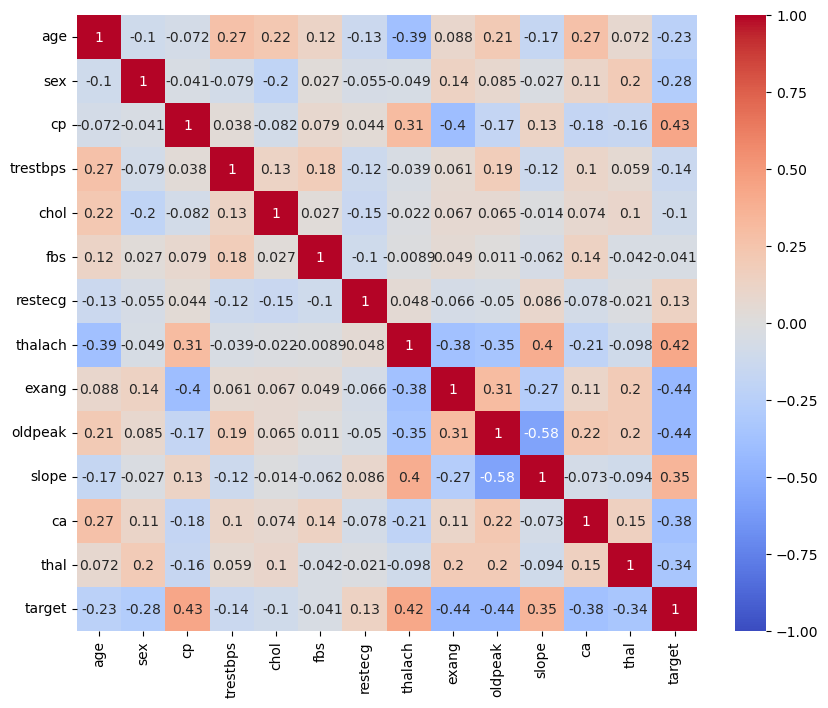

In [5]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot=True,cmap='coolwarm',vmin=-1,vmax=1)
plt.show()

CP, thalach, slope has moderate positive correlation to target.
exang, oldpeak, ca, thal has moderate negative correlation to target.
age, sex has weak negative correlation.
rest, no correlation.

In [6]:
for col in data.columns:
    print(col,data[col].isna().sum())

age 0
sex 0
cp 0
trestbps 0
chol 0
fbs 0
restecg 0
thalach 0
exang 0
oldpeak 0
slope 0
ca 0
thal 0
target 0


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [9]:
x = data.drop('target',axis=1)

In [10]:
x.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3


In [11]:
y = data['target']

In [12]:
y.tail()

1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, dtype: int64

In [13]:
x.shape, y.shape

((1025, 13), (1025,))

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=420)

# Using KNN 

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [39]:
errorRate = []
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print("Accuracy = ",accuracy_score(y_test,y_pred))
    print("F1 = ",f1_score(y_pred,y_test))
    print("Recall = ",recall_score(y_pred,y_test))
    print("Precision = ",precision_score(y_pred,y_test))
    errorRate.append(1 - accuracy_score(y_test,y_pred))
    print("===============================================")

Accuracy =  0.9658536585365853
F1 =  0.9637305699481865
Recall =  1.0
Precision =  0.93
Accuracy =  0.926829268292683
F1 =  0.918918918918919
Recall =  1.0
Precision =  0.85
Accuracy =  0.9170731707317074
F1 =  0.9109947643979057
Recall =  0.9560439560439561
Precision =  0.87
Accuracy =  0.8292682926829268
F1 =  0.7976878612716763
Recall =  0.9452054794520548
Precision =  0.69
Accuracy =  0.7121951219512195
F1 =  0.7035175879396985
Recall =  0.7070707070707071
Precision =  0.7
Accuracy =  0.7121951219512195
F1 =  0.6628571428571428
Recall =  0.7733333333333333
Precision =  0.58
Accuracy =  0.7073170731707317
F1 =  0.6938775510204082
Recall =  0.7083333333333334
Precision =  0.68
Accuracy =  0.6926829268292682
F1 =  0.6666666666666666
Recall =  0.7078651685393258
Precision =  0.63
Accuracy =  0.7414634146341463
F1 =  0.736318407960199
Recall =  0.7326732673267327
Precision =  0.74
Accuracy =  0.7073170731707317
F1 =  0.6774193548387096
Recall =  0.7325581395348837
Precision =  0.63


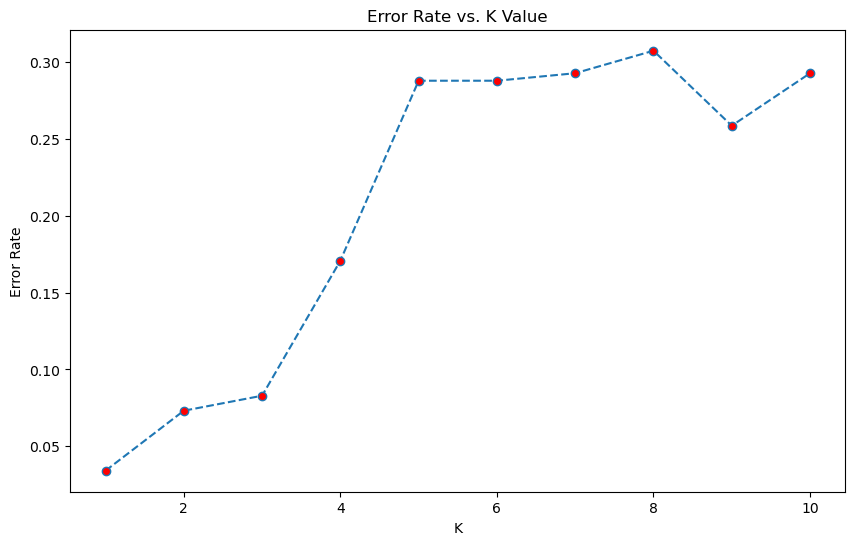

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), errorRate, marker='o', linestyle='dashed', markerfacecolor='red')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [41]:
knn = KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("Accuracy = ",accuracy_score(y_test,y_pred))
print("F1 = ",f1_score(y_pred,y_test))
print("Recall = ",recall_score(y_pred,y_test))
print("Precision = ",precision_score(y_pred,y_test))

Accuracy =  0.9658536585365853
F1 =  0.9637305699481865
Recall =  1.0
Precision =  0.93


k = 1 has the highest score in all categories

In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
confusionMatrix = confusion_matrix(y_test,y_pred)

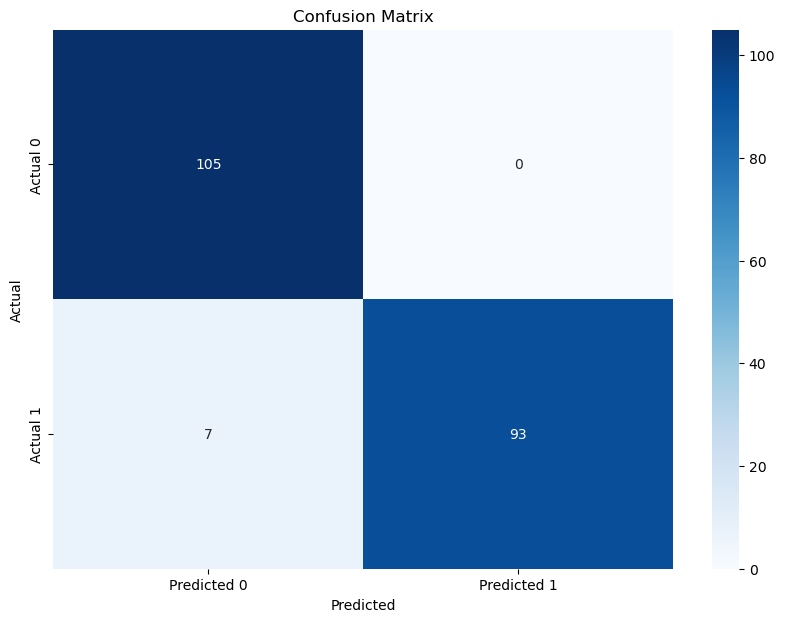

In [44]:
plt.figure(figsize=(10, 7))
sns.heatmap(confusionMatrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [45]:
from sklearn.metrics import precision_recall_curve, average_precision_score

In [46]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
avg_precision = average_precision_score(y_test, y_pred)

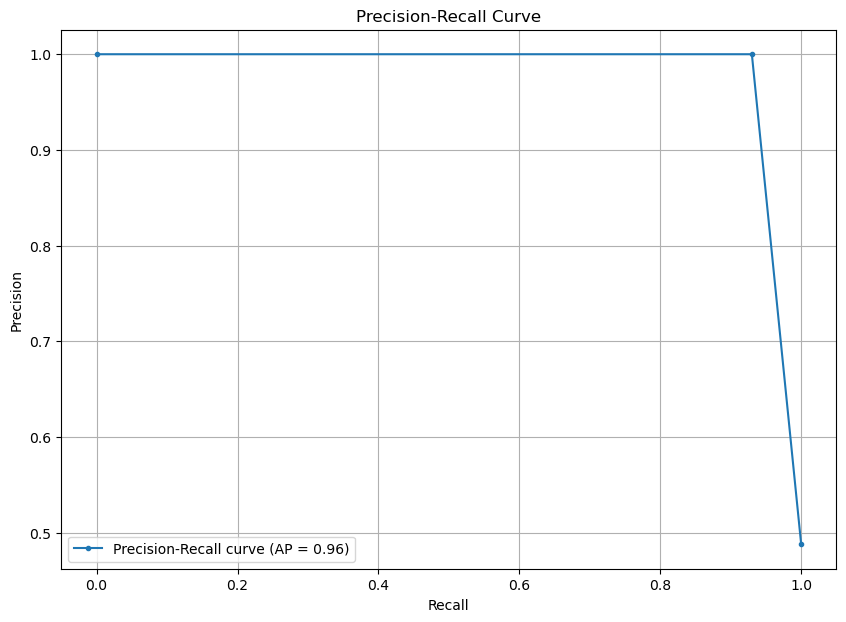

In [47]:
plt.figure(figsize=(10, 7))
plt.plot(recall, precision, marker='.', label=f'Precision-Recall curve (AP = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

# Using Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [49]:
model = lr.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy_score(y_test,y_pred)

c:\Users\Ashwin V\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8585365853658536

Logistic Regression -> 0.85 Accuracy

# Using Decision Trees

In [50]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [51]:
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print("Accuracy = ",accuracy_score(y_test,y_pred))
print("F1 = ",f1_score(y_pred,y_test))
print("Recall = ",recall_score(y_pred,y_test))
print("Precision = ",precision_score(y_pred,y_test))

Accuracy =  1.0
F1 =  1.0
Recall =  1.0
Precision =  1.0


In [52]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(dt, x, y, cv=100, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean()}")


Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
Mean CV Accuracy: 1.0


Decision Tree -> 1 Accuracy

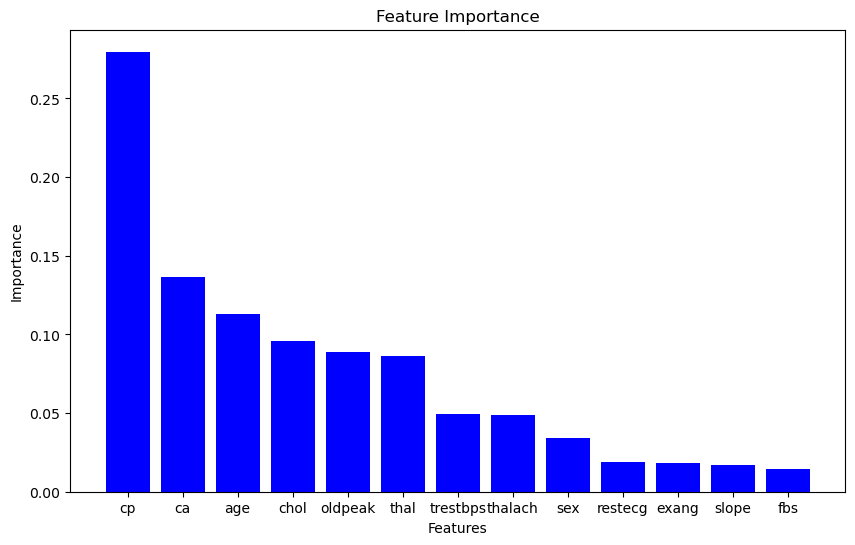

In [53]:
feature_importances = dt.feature_importances_
features = x.columns if isinstance(x, pd.DataFrame) else range(x.shape[1])
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='blue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()


Features important to the decision tree

# Using Random Forest Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print("Accuracy = ",accuracy_score(y_test,y_pred))
print("F1 = ",f1_score(y_pred,y_test))
print("Recall = ",recall_score(y_pred,y_test))
print("Precision = ",precision_score(y_pred,y_test))

Accuracy =  1.0
F1 =  1.0
Recall =  1.0
Precision =  1.0


In [55]:
cv_scores_rf = cross_val_score(rf, x, y, cv=10, scoring='accuracy')
print(f"Random Forest Cross-Validation Accuracy Scores: {cv_scores_rf}")
print(f"Mean CV Accuracy for Random Forest: {cv_scores_rf.mean()}")

Random Forest Cross-Validation Accuracy Scores: [1.         1.         1.         1.         1.         1.
 1.         1.         0.97058824 1.        ]
Mean CV Accuracy for Random Forest: 0.9970588235294118


Accuracy of Random Forest -> 1

But Decision Tree's Cross Validation is better than Random Forest's